In [39]:
import pandas as pd
import numpy as np

#sentiment analysis packages
import re
import nltk
import seaborn as sns
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import BigramCollocationFinder
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from textblob import TextBlob

#topic modeling packages
import gensim
from gensim import corpora

from sklearn.feature_extraction.text import TfidfVectorizer
#for the topic modeling!
from sklearn.decomposition import NMF

from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to /Users/Stefanie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Stefanie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Stefanie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Medical Transcription Data

In [2]:
df = pd.read_csv('MedicalTranscripts.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          2182 non-null   int64 
 1   transcription  2170 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.2+ KB


,Index,transcription
0,0,"SUBJECTIVE:, This 23-year-old white female pr..."
1,1,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,2,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,3,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,4,1. The left ventricular cavity size and wall ...


### Data Cleaning

In [4]:
#drop all observations with null transcriptions
df.dropna(subset=['transcription'], inplace=True)

In [5]:
def token_stop_LDA(text):
    # replace any non-letters (except numbers) with a space
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # lower case the text
    text = text.lower()
    
    # tokenize the text
    tokens = word_tokenize(text) 
    newlist = []
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          newlist.append(word)
    return newlist


# apply the function clean to each transcription
df['cleaned transcription'] = df['transcription'].apply(token_stop_LDA)
df.head(2)

,Index,transcription,cleaned transcription
0,0,"SUBJECTIVE:, This 23-year-old white female pr...","[subjective, year, old, white, female, present..."
1,1,"PAST MEDICAL HISTORY:, He has difficulty climb...","[past, medical, history, difficulty, climbing,..."


### Topic Modeling - LDA 

In [6]:
dict_ = corpora.Dictionary(df['cleaned transcription'])
print(dict_)

Dictionary<18290 unique tokens: ['adenopathy', 'ago', 'allegra', 'allergic', 'allergies']...>


In [7]:
doc_term_matrix = [dict_.doc2bow(i) for i in df['cleaned transcription']]

In [8]:
topic_3 = 3
topic_5 = 5
topic_7 = 7
topic_9 = 9
chunksize = 1000
passes = 20
iterations = 400
eval_every = None 

lda = gensim.models.LdaModel

In [9]:
lda_model_9 = lda(doc_term_matrix,
    num_topics=topic_9,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [10]:
lda_model_9.print_topics(num_words=10)

[(0,
  '0.015*"c" + 0.015*"patient" + 0.014*"placed" + 0.010*"left" + 0.009*"procedure" + 0.008*"incision" + 0.007*"l" + 0.007*"anesthesia" + 0.007*"well" + 0.007*"using"'),
 (1,
  '0.015*"normal" + 0.012*"right" + 0.011*"foot" + 0.011*"tendon" + 0.008*"joint" + 0.008*"lateral" + 0.007*"medial" + 0.007*"ankle" + 0.007*"left" + 0.006*"stress"'),
 (2,
  '0.021*"artery" + 0.017*"patient" + 0.014*"placed" + 0.012*"left" + 0.010*"procedure" + 0.010*"carotid" + 0.009*"right" + 0.008*"running" + 0.008*"femoral" + 0.008*"using"'),
 (3,
  '0.019*"patient" + 0.018*"procedure" + 0.013*"lead" + 0.011*"right" + 0.010*"catheter" + 0.009*"atrial" + 0.008*"using" + 0.008*"left" + 0.007*"placed" + 0.007*"sheath"'),
 (4,
  '0.033*"right" + 0.028*"left" + 0.023*"artery" + 0.020*"pulmonary" + 0.015*"normal" + 0.008*"aorta" + 0.007*"stenosis" + 0.007*"catheter" + 0.007*"proximal" + 0.006*"flow"'),
 (5,
  '0.022*"patient" + 0.020*"history" + 0.012*"mg" + 0.007*"heart" + 0.007*"pain" + 0.006*"normal" + 0.006

In [11]:
lda_model_9.log_perplexity(doc_term_matrix)

-7.82595145703357

In [12]:
lda_model_7 = lda(doc_term_matrix,
    num_topics=topic_7,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [32]:
lda_model_7.print_topics(num_words=10)

[(0,
  '0.016*"patient" + 0.013*"placed" + 0.013*"c" + 0.011*"left" + 0.009*"procedure" + 0.007*"incision" + 0.007*"used" + 0.007*"right" + 0.007*"anesthesia" + 0.006*"well"'),
 (1,
  '0.016*"right" + 0.013*"normal" + 0.012*"left" + 0.006*"pain" + 0.006*"foot" + 0.006*"tendon" + 0.006*"mri" + 0.005*"exam" + 0.005*"mild" + 0.005*"spine"'),
 (2,
  '0.021*"artery" + 0.016*"patient" + 0.013*"placed" + 0.012*"left" + 0.010*"carotid" + 0.008*"right" + 0.008*"running" + 0.008*"procedure" + 0.008*"femoral" + 0.008*"using"'),
 (3,
  '0.018*"patient" + 0.017*"procedure" + 0.012*"catheter" + 0.011*"lead" + 0.010*"right" + 0.009*"atrial" + 0.008*"left" + 0.008*"using" + 0.008*"removed" + 0.007*"needle"'),
 (4,
  '0.035*"left" + 0.030*"artery" + 0.030*"right" + 0.017*"coronary" + 0.012*"pulmonary" + 0.011*"catheter" + 0.009*"stenosis" + 0.009*"patient" + 0.009*"normal" + 0.008*"french"'),
 (5,
  '0.022*"patient" + 0.018*"history" + 0.011*"mg" + 0.007*"pain" + 0.006*"heart" + 0.006*"normal" + 0.005*

In [13]:
#lowest log perplexity
lda_model_7.log_perplexity(doc_term_matrix)

-7.814665314218572

In [14]:
lda_model_5 = lda(doc_term_matrix,
    num_topics=topic_5,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [33]:
lda_model_5.print_topics(num_words=10)

[(0,
  '0.019*"patient" + 0.017*"procedure" + 0.011*"left" + 0.011*"right" + 0.010*"c" + 0.009*"placed" + 0.007*"chest" + 0.006*"well" + 0.005*"removed" + 0.005*"diagnosis"'),
 (1,
  '0.013*"right" + 0.012*"normal" + 0.011*"left" + 0.006*"pain" + 0.005*"exam" + 0.005*"l" + 0.004*"mild" + 0.004*"foot" + 0.004*"mri" + 0.004*"unremarkable"'),
 (2,
  '0.015*"patient" + 0.013*"placed" + 0.008*"artery" + 0.007*"procedure" + 0.007*"right" + 0.007*"using" + 0.007*"left" + 0.006*"performed" + 0.006*"incision" + 0.006*"carotid"'),
 (3,
  '0.022*"patient" + 0.017*"history" + 0.010*"mg" + 0.006*"pain" + 0.006*"normal" + 0.005*"heart" + 0.005*"also" + 0.005*"disease" + 0.005*"past" + 0.005*"daily"'),
 (4,
  '0.033*"left" + 0.031*"artery" + 0.028*"right" + 0.017*"coronary" + 0.010*"pulmonary" + 0.010*"catheter" + 0.009*"patient" + 0.009*"stenosis" + 0.009*"normal" + 0.007*"french"')]

In [15]:
lda_model_5.log_perplexity(doc_term_matrix)

-7.828585627470141

In [16]:
lda_model_3 = lda(doc_term_matrix,
    num_topics=topic_3,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [17]:
lda_model_3.print_topics(num_words=10)

[(0,
  '0.026*"left" + 0.024*"artery" + 0.023*"right" + 0.013*"patient" + 0.011*"coronary" + 0.010*"procedure" + 0.009*"catheter" + 0.007*"pulmonary" + 0.006*"performed" + 0.006*"stenosis"'),
 (1,
  '0.020*"patient" + 0.016*"history" + 0.010*"mg" + 0.007*"normal" + 0.006*"pain" + 0.005*"heart" + 0.005*"disease" + 0.005*"also" + 0.005*"past" + 0.004*"daily"'),
 (2,
  '0.013*"patient" + 0.010*"right" + 0.009*"left" + 0.008*"placed" + 0.007*"procedure" + 0.007*"c" + 0.005*"well" + 0.005*"incision" + 0.004*"using" + 0.004*"anesthesia"')]

In [34]:
lda_model_3.log_perplexity(doc_term_matrix)

-7.8868891057806065

### Collocations - Most Common Phrases

In [19]:
#clean text for collocations
def token_stop_collocations(text):
    
    # replace any non-letters (except numbers) with a space
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # lower case the text
    text = text.lower()
    
    tokens = nltk.word_tokenize(text) # tokenize the text
    
    new_text = ""
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          new_text = new_text + " " + word
    return new_text

In [24]:
df['collocations transcription'] = df['transcription'].apply(token_stop_collocations)
df.head(2)

,Index,transcription,cleaned transcription,collocations transcription
0,0,"SUBJECTIVE:, This 23-year-old white female pr...","[subjective, year, old, white, female, present...",subjective year old white female presents com...
1,1,"PAST MEDICAL HISTORY:, He has difficulty climb...","[past, medical, history, difficulty, climbing,...",past medical history difficulty climbing stai...


In [27]:
#turn 'collocations transcription' column into one string
text_str = ' '.join([str(val) for val in df['collocations transcription'].values])

In [30]:
bigram_measures = BigramAssocMeasures()

In [28]:
finder = BigramCollocationFinder.from_words(word_tokenize(text_str))

In [31]:
#most common short phrases 
finder.nbest(bigram_measures.pmi, 5)

[('abbott', 'northwestern'),
 ('abo', 'incompatibility'),
 ('acellular', 'dpt'),
 ('acetyl', 'cysteine'),
 ('acupuncture', 'tens')]

## Ted Talks

In [35]:
ted_main = pd.read_csv('ted_main.csv')
transcripts = pd.read_csv('transcripts.csv')

In [36]:
ted_main.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


### Most Common Occupations of TED Talk Speakers

In [37]:
common_occupation = ted_main['speaker_occupation'].value_counts().rename_axis('Occupation').reset_index(name='Count')
common_occupation.head()

,Occupation,Count
0,Writer,45
1,Designer,34
2,Artist,34
3,Journalist,33
4,Entrepreneur,31


Text(0.5, 1.0, 'Most Common Occupations')

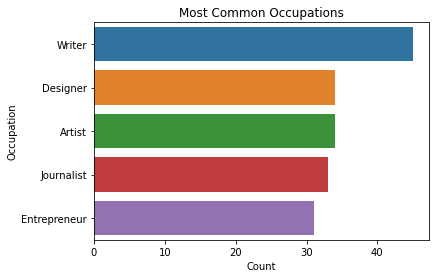

In [40]:
common_occupation = common_occupation.iloc[:5]
sns.barplot(x=common_occupation['Count'], y=common_occupation['Occupation'])
plt.title('Most Common Occupations')

### Selecting Top 100 most popular Ted Talks 

In [45]:
#top 100 ted talks by views
ted_main = ted_main.sort_values(by=['views'],ascending=False)[:100]
ted_main.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405


In [46]:
transcripts.head(2)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...


In [47]:
#merge 'ted_main' and 'transcripts' on 'url' col
merge_df = pd.merge(ted_main, transcripts, on='url')

In [48]:
#take out only speaker and transcript
merged_transcript = merge_df[['main_speaker','transcript']]

In [49]:
def token_stop_transcript(text):
    
    # replace any non-letters (except numbers) with a space
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # lower case the text
    text = text.lower()
    
    tokens = nltk.word_tokenize(text) # tokenize the text
    
    new_text = ""
    for word in tokens:
        if word not in set(stopwords.words('english')): # remove stop words
          new_text = new_text + " " + word
    return new_text

merged_transcript['cleaned transcript'] = merged_transcript['transcript'].apply(token_stop_transcript)
merged_transcript.head(2)

<ipython-input-49-66e8564d46bf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_transcript['cleaned transcript'] = merged_transcript['transcript'].apply(token_stop_transcript)


,main_speaker,transcript,cleaned transcript
0,Ken Robinson,Good morning. How are you?(Laughter)It's been ...,good morning laughter great blown away whole ...
1,Amy Cuddy,So I want to start by offering you a free no-t...,want start offering free tech life hack requi...


In [51]:
stop_words = stopwords.words('english')
#extend the stop word list with common filler words from TED talks
stop_words.extend(['one','things','got','like','going','laughter','applause','would','say','really','think','something','could','people','get','ok','make','actually','two','also','much','even','go','ca','em','us','yeah'])

## Most Common Themes

In [52]:
vectorizer = TfidfVectorizer(stop_words = stop_words , min_df = 0.1)

In [53]:
tfidf = vectorizer.fit_transform(merged_transcript['cleaned transcript'])

In [54]:
nmf = NMF(n_components = 6)

In [55]:
topic_values = nmf.fit_transform(tfidf)

In [56]:
for topic_num, topic in enumerate(nmf.components_):
    message = 'Topic #{}: '.format(topic_num + 1)
    message += ' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: want know time life way love happiness work feel thing
Topic #2: shame said ted women men talk vulnerable know walk man
Topic #3: music ends play know passion thank brother eyes piece lot
Topic #4: kids education school children students know learn teaching food america
Topic #5: see right information body use world light universe camera look
Topic #6: said email know thought car women okay depression well love


In [57]:
#looking the words at each topic above and naming them
topic_labels = ['happiness in life',
                'feminine/masculine vulnerability',
                'music','early education',
                'introspection',
                'heartbreak']

In [58]:
#dataframe of topic scores
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics.head(2)

,happiness in life,feminine/masculine vulnerability,music,early education,introspection,heartbreak
0,0.019918,0.011224,0.034344,0.404180,0.036168,0.168531
1,0.174173,0.023857,0.000000,0.006875,0.131649,0.000000


In [59]:
#attach dataframe of topic scores to each transcript
merged_transcript = merged_transcript.reset_index(drop=True)
merged_transcript = merged_transcript.join(df_topics)

In [60]:
merged_transcript.head(2)

,main_speaker,transcript,cleaned transcript,happiness in life,feminine/masculine vulnerability,music,early education,introspection,heartbreak
0,Ken Robinson,Good morning. How are you?(Laughter)It's been ...,good morning laughter great blown away whole ...,0.019918,0.011224,0.034344,0.404180,0.036168,0.168531
1,Amy Cuddy,So I want to start by offering you a free no-t...,want start offering free tech life hack requi...,0.174173,0.023857,0.000000,0.006875,0.131649,0.000000


In [61]:
#score threshold of 0.2
for topic in topic_labels:
    merged_transcript.loc[merged_transcript[topic] > 0.2, topic] = 1
    merged_transcript.loc[merged_transcript[topic] < 0.2, topic] = 0

In [62]:
for topic in topic_labels:
    print(f"Among the top 100 most popular TED talks, there are {merged_transcript[topic].sum()} talks about {topic}")

Among the top 100 most popular TED talks, there are 23.0 talks about happiness in life
Among the top 100 most popular TED talks, there are 3.0 talks about feminine/masculine vulnerability
Among the top 100 most popular TED talks, there are 7.0 talks about music
Among the top 100 most popular TED talks, there are 9.0 talks about early education
Among the top 100 most popular TED talks, there are 19.0 talks about introspection
Among the top 100 most popular TED talks, there are 7.0 talks about heartbreak
